# Predicting the diabete diagnosis of a woman based on several factors using Machine Learning

# Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns


### Loading the data from GitHub

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/cnachteg/diabetes_dataset/master/dataset_diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
# Renaming columns for clarity purposes
df.rename({'preg':'Number of pregnancies','plas':'Plasma glucose concentration','pres':'Diastolic blood pressure','skin':'Triceps skin fold thickness','mass':'Body mass index','pedi':'Diabetes pedigree','insu':'Insulin'}, axis=1, inplace=True)

# Creating seperate columns in binary format for positive and negative test results to graph and compare 
df['positive result'] = np.where(df['class'] == 'tested_negative',0,1)

df['negative result'] = df['positive result'].copy()

df['negative result'] = np.where(df['class'] == 'tested_negative',1,0)
df.head()

,Number of pregnancies,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Insulin,Body mass index,Diabetes pedigree,age,class,positive result,negative result
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1,0
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0,1
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1,0
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0,1
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1,0


Factor specifications:

* Plasma glucose concentration: Done in a 2 hour oral glucose tolerance test

* Diastolic blood pressure: Measured in mmHg

* Triceps skin fold thickness: Measured in millimetres

* Insulin: 2-Hour serum insulin(mu U/ml)(Already prescribed)

* Body mass index: Measured in kg/(height in m)^2

* Diabetes pedigree function: Probability of getting diabetes based on ancestry
 
  Source:https://github.com/cnachteg/diabetes_dataset

### A quick analysis of the data

In [5]:
df.describe()

,Number of pregnancies,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Insulin,Body mass index,Diabetes pedigree,age,positive result,negative result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


From a brief overview of the statistics of the dataset, we can assume that the data is skewed notably by comparing the means of the positive and negative results, which seem to contain around twice as much data regarding women with negative results, than positive ones. The fact that this dataset is skew can have an important effect on the certainty of the predictions made by each model since it has more negative data to train with than positive ones.

Apart from the skewness of the data, we can see that most women in the dataset have had 3 to 4 pregnancies. This can make us question, does the number of pregnancies have an effect on the other factors, that will also be used to predict, using machine learning, if a woman is more likely to be tested positive or negative for diabetes?

In the following section, analysis using plots, the correlation between each of the factors and the number of pregnancies will be explored, which can help determine if the number of pregnancies a woman decides to go through, can have an impact on her chances of being diagnosed positive or negative for diabetes.

# Analyzing through plots

###Plot 1: Number of pregnancies versus test results

In [15]:
# Creating a separate dataframe, grouping by category the number of pregnancies each woman had and how many of each positive and negative diabetes test are diagnosed per category

dpr = df.groupby(['Number of pregnancies'])['positive result', 'negative result'].sum()

dpr['Women per category'] = df['Number of pregnancies'].value_counts()

dpr

,positive result,negative result,Women per category
Number of pregnancies,,,
0,38,73,111
1,29,106,135
2,19,84,103
3,27,48,75
4,23,45,68
5,21,36,57
6,16,34,50
7,25,20,45
8,22,16,38


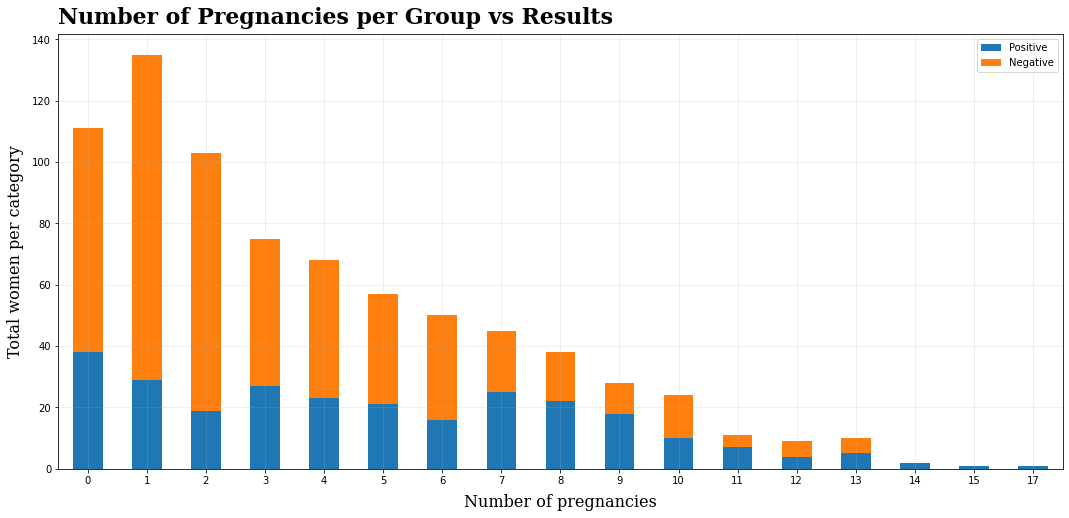

In [16]:
# Plot 1 Number of Pregnancies vs Results : Bar plot

#plt.figure(figsize=[21,9], dpi=300)

# In case the previous line doesn't work, to adjust the size of the plot, uncomment the following line: (from Matplotlib)
rcParams['figure.figsize'] = 18, 8

x_labels = dpr.index

#Choosing the positive and negative result columns to create a stacked bar plot
positive = dpr['positive result']
negative = dpr['negative result']

# Naming the legend and setting the stacked bar values
dprplot = pd.DataFrame({'Positive': positive,'Negative': negative}, index = x_labels)

plot_1=  dprplot.plot.bar(rot=0,stacked=True)

# Formating of each plot presented in this project is inspired by J. Sumner colab: MakingPrettyPictures
plt.title(
    "Number of Pregnancies per Group vs Results", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Total women per category",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

As can be seen, the data is indeed skewed (right-tailed). Thus from the graph, we can conclude that the prediction made by the mean is not completely accurate since most women in the data seem to have had none, one or two pregnancies, although the majority, in general, has had less than 5 pregnancies. This can further help us conclude that the predictions that will be made by the models will be significantly impacted by the skewness of the data.

### Plot 2: Age versus number of pregnancies versus test results

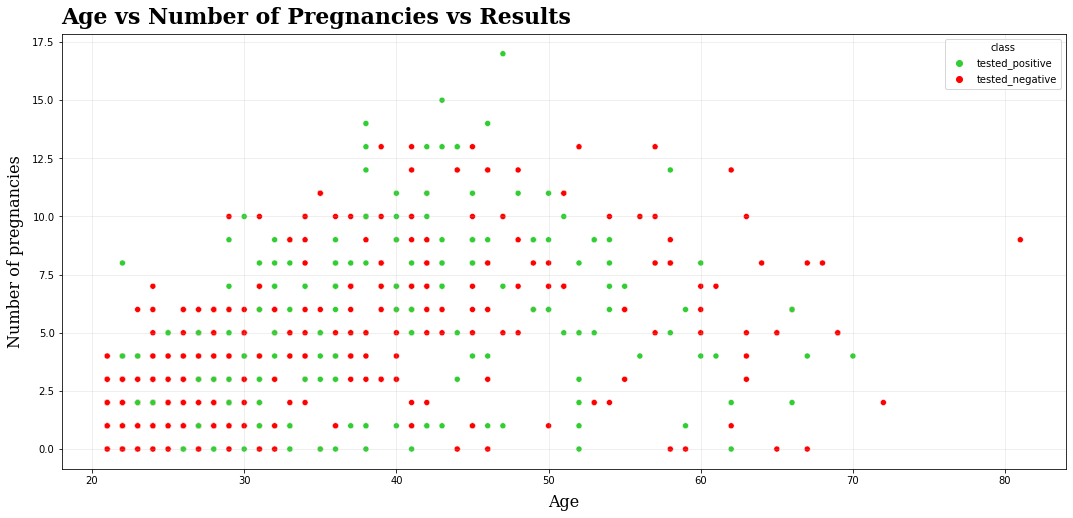

The coefficient of correlation is: 0.5443412284023393


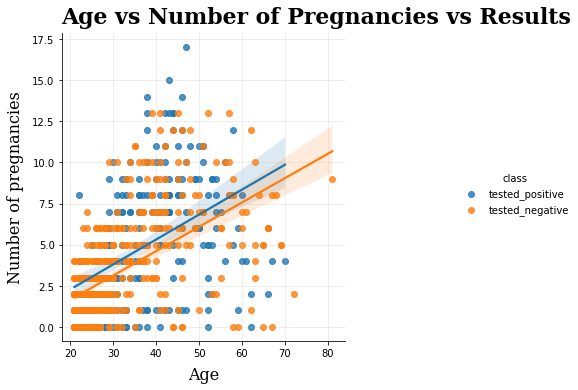

In [17]:
#Plot 2: Correlation: Age vs Number of Pregnancies vs Results

# The source for the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# creating a scatter plot where each dot's colour represents the diagnosis result
sns.scatterplot(data=df, x="age", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

#plt.figure(figsize=[21,9], dpi=300)
rcParams['figure.figsize'] = 20, 10

plt.title(
    "Age vs Number of Pregnancies vs Results", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Age",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)


plt.show()

#Plot 2.2: with regression line

rcParams['figure.figsize'] = 20, 10

x = df["age"]
y = df["Number of pregnancies"]


# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="age", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))


plt.title(
    "Age vs Number of Pregnancies vs Results", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Age",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)
rcParams['figure.figsize'] = 20, 10
plt.show()


From the coefficient of correlation obtained by the correlation function (0.54), there seems to be a 50/50 correlation between the age factor and the number of pregnancies. As for the positive and negative test results, we can see that both lines of best fit seem to have a similar positive correlation thus establishing a link between the diagnosis of diabetes with the age and number of pregnancies a woman had.

### Plot 3:  Plasma glucose Concentration versus number of pregnancies vs results

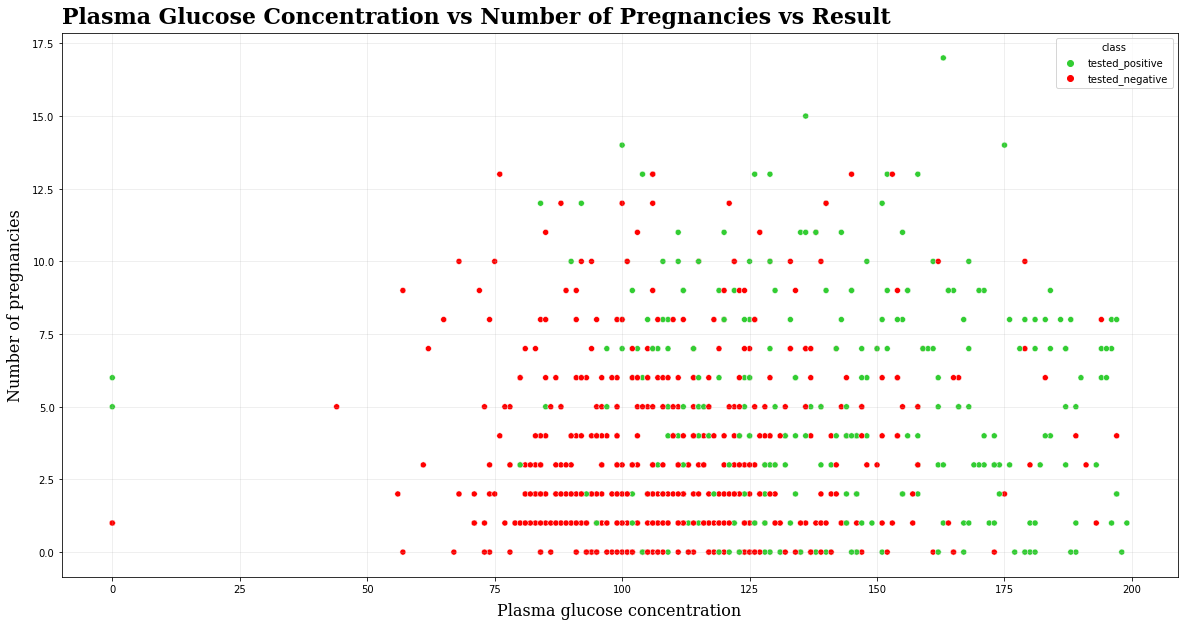

The coefficient of correlation is: 0.12945867149927245


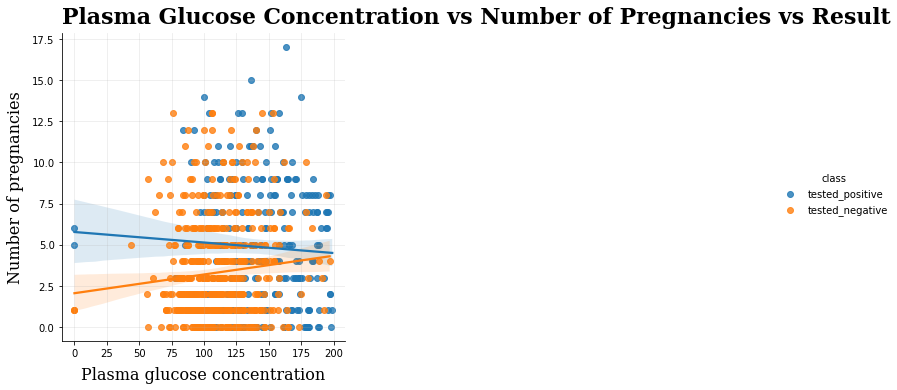

In [18]:
# Plot 3 Correlation: Plasma Glucose Concentration versus Number of Pregnancies vs Result

# the source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Plasma glucose concentration", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

rcParams['figure.figsize'] = 20, 10
plt.title(
    "Plasma Glucose Concentration vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Plasma glucose concentration",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()

#Plot 3.2 : With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Plasma glucose concentration"]
y = df["Number of pregnancies"]

# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="Plasma glucose concentration", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))

plt.title(
    "Plasma Glucose Concentration vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Plasma glucose concentration",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)


plt.show()

From the coefficient of correlation obtained by the correlation function (0.13), there seems to be a weak correlation between the plasma glucose concentration factor and the number of pregnancies. Although for the positive and negative test results, we can see a trend. The majority of those who scored below 140 in the glucose tolerance test were diagnosed negative for diabetes, whereas the majority who were positive lied above 140. Although, because of the oppositely signed slopes of the positive and negative result's, the legitimacy of these assumed trends can't be confirmed.

### Plot 4: Diastolic blood pressure versus number of pregnancies vs results

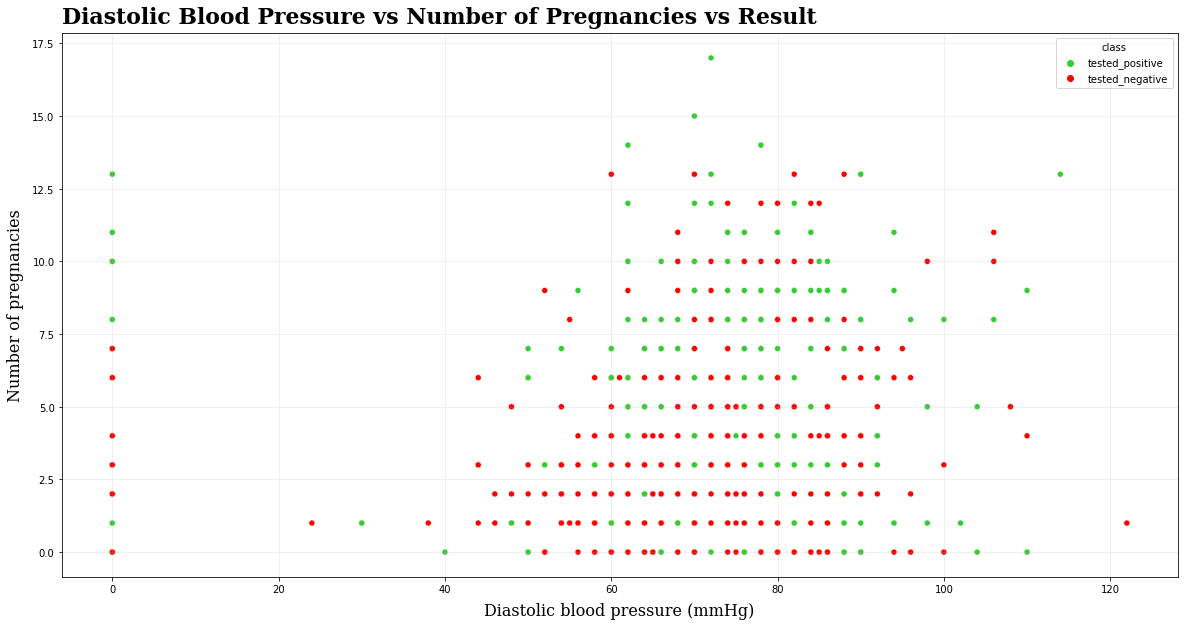

The coefficient of correlation is: 0.14128197740713988


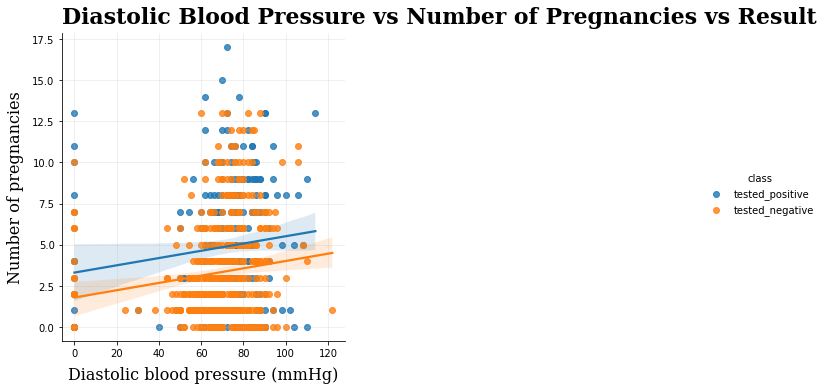

In [19]:
#Plot 4: Correlation:  Diastolic blood pressure versus Number of Pregnancies vs Result

# The source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Diastolic blood pressure", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

rcParams['figure.figsize'] = 20, 10

plt.title(
    "Diastolic Blood Pressure vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Diastolic blood pressure (mmHg)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)


plt.show()

#Plot 4.2 : With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Diastolic blood pressure"]
y = df["Number of pregnancies"]

# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="Diastolic blood pressure", y="Number of pregnancies", hue="class", data=df)


print('The coefficient of correlation is:', x.corr(y))

plt.title(
    "Diastolic Blood Pressure vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Diastolic blood pressure (mmHg)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()


From the coefficient of correlation obtained by the correlation function (0.14), there seems to be a weak correlation between the diastolic blood pressure factor and the number of pregnancies. Although for the positive and negative test results, we can see a trend. The majority of those who had 7 or less pregnancies and have a blood pressure ranging from 45 to 95 in mmHg, were diagnosed negative for diabetes, whereas the positive majority lied in around the same range but had more than 7 pregnancies. As for the positive and negative test results, we can see that both lines of best fit seem to have a similar positive correlation thus reinforcing the assumptions made.

### Plot 5: Triceps skin fold thickness versus number of pregnancies vs results

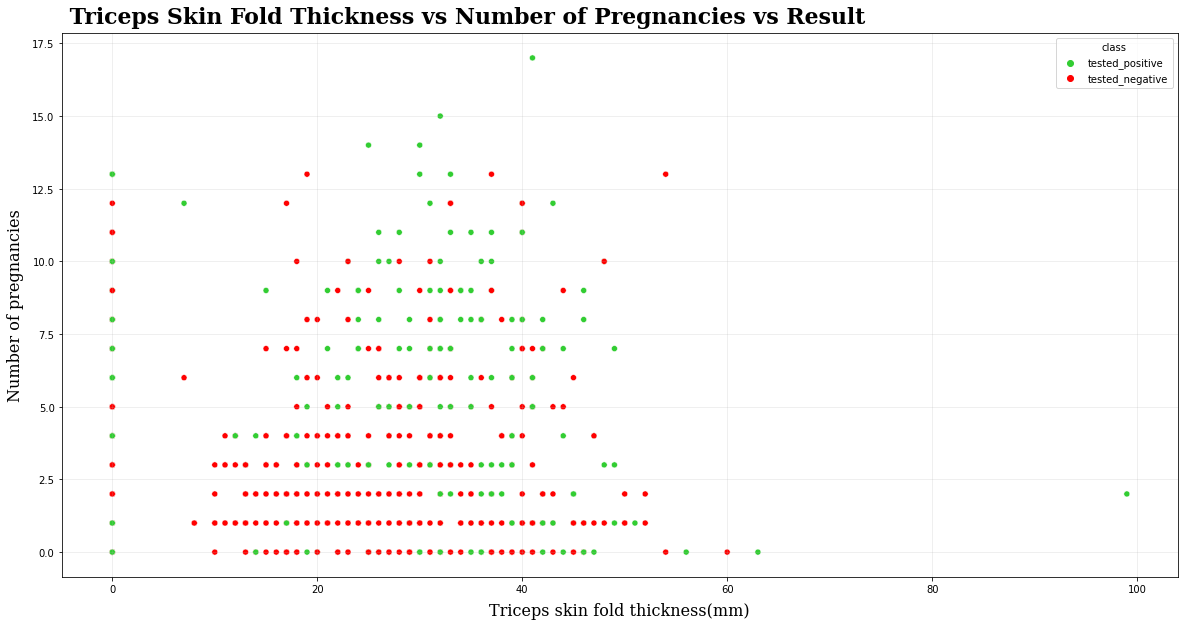

The coefficient of correlation is: -0.08167177444900721


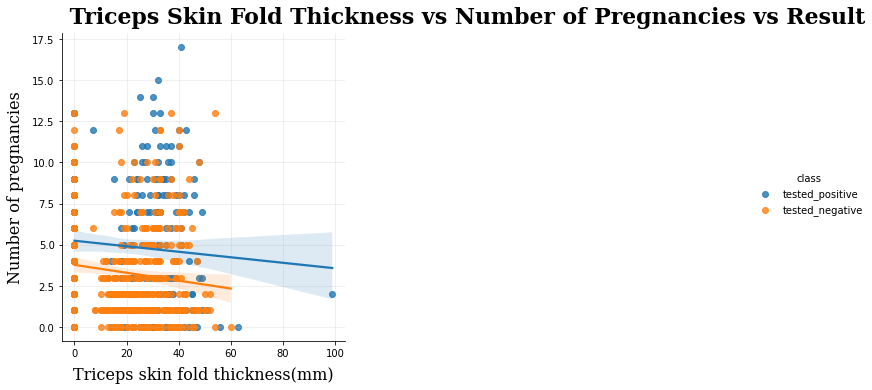

In [20]:
##5 Correlation: Number of Pregnancies vs Triceps skin fold thickness vs Result

# The source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Triceps skin fold thickness", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

rcParams['figure.figsize'] = 20, 10

plt.title(
    " Triceps Skin Fold Thickness vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Triceps skin fold thickness(mm)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()

#Plot 5.2: With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Triceps skin fold thickness"]
y = df["Number of pregnancies"]


# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="Triceps skin fold thickness", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))

plt.title(
    " Triceps Skin Fold Thickness vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Triceps skin fold thickness(mm)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)


plt.show()


From the coefficient of correlation obtained by the correlation function (-0.08), there seems to be a weak correlation between the triceps skin fold thickness factor and the number of pregnancies, since it is closer to 0 than 1. Although for the positive and negative test results, we can see a trend. Once again, the majority of those who had less than 7 pregnancies and have a triceps skin fold thickness ranging from 10 to 45 millimetres were diagnosed negative for diabetes, whereas the positive majority lied in the same range but had more than 7 pregnancies. As for the positive and negative test results, we can see that both slopes of regression lines seem to have a similar negative correlation, thus reinforcing the assumptions made.

### Plot 6: Insulin versus number of pregnancies vs results

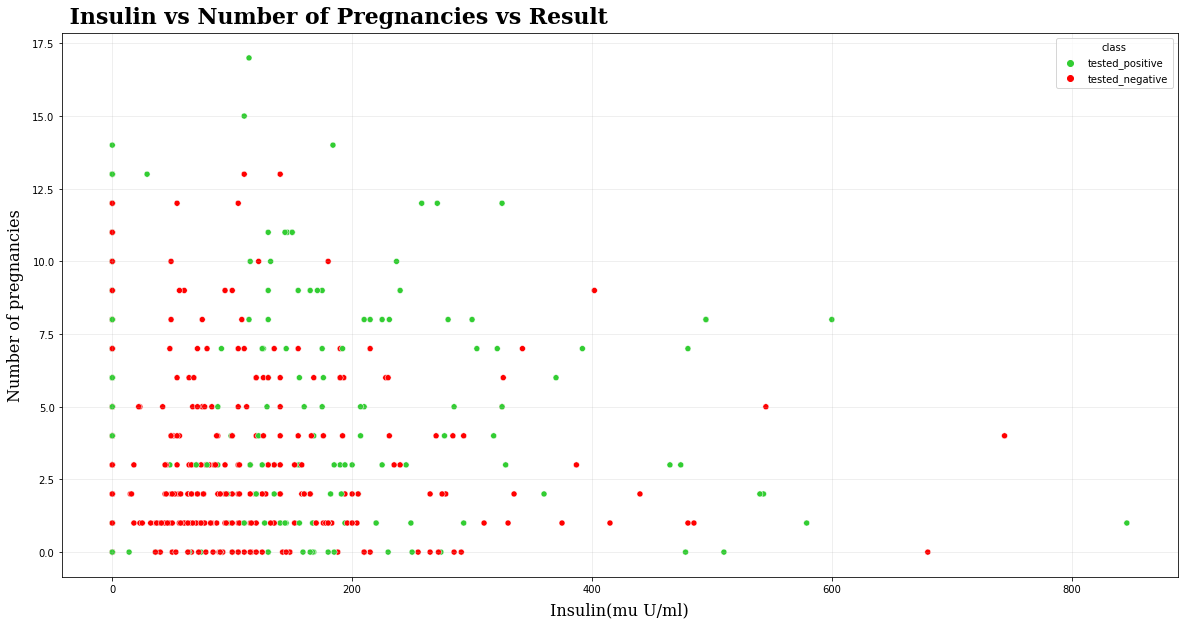

The coefficient of correlation is: -0.07353461435162825


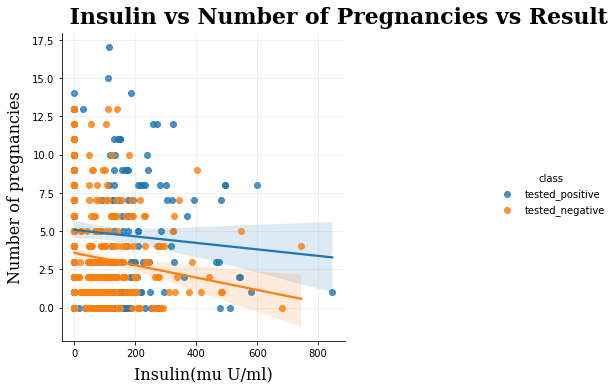

In [21]:
##6 Correlation: Number of Pregnancies vs Insulin vs Result

# Fixing a warning output. Source:https://stackoverflow.com/questions/64130332/seaborn-futurewarning-pass-the-following-variables-as-keyword-args-x-y

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# ploting by specifying the x, y parameters
# The source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Insulin", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])


rcParams['figure.figsize'] = 20, 10

plt.title(
    " Insulin vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Insulin(mu U/ml)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()


#Plot 6.2:With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Insulin"]
y = df["Number of pregnancies"]

# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot("Insulin", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))

plt.title(
    " Insulin vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Insulin(mu U/ml)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()


From the coefficient of correlation obtained by the correlation function (-0.07), there seems to be a weak correlation between the amount of insulin taken by each of the women and the number of pregnancies they had. Although for the positive and negative test results, we can see a trend. The majority of those who had 7 or less pregnancies and take insulin ranging from none to around 200 (mu U/ml) were diagnosed negative for diabetes, whereas the positive majority takes around 150 and 400(mu U/ml) of insulin. The assumed trend can somewhat be confirmed by analyzing the regression lines of both positive and negative results since both of them have a similar negative slope.

### Plot 7: Body mass index versus number of pregnancies vs results

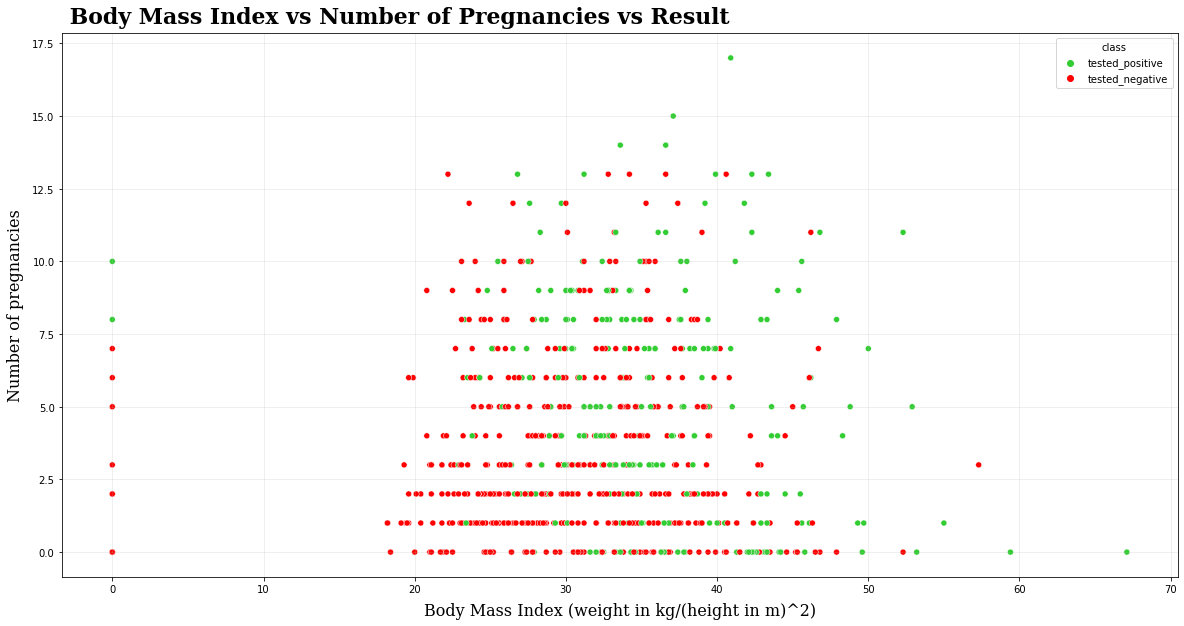

The coefficient of correlation is: 0.017683090727830596


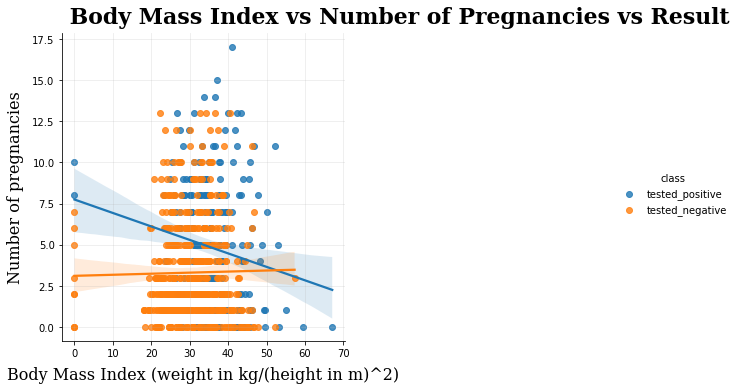

In [22]:
##7 Correlation: Number of Pregnancies vs Body mass vs Result

# The source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Body mass index", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

rcParams['figure.figsize'] = 20, 10

plt.title(
    " Body Mass Index vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Body Mass Index (weight in kg/(height in m)^2)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()

#Plot 7.2: With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Body mass index"]
y = df["Number of pregnancies"]

# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="Body mass index", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))

plt.title(
    " Body Mass Index vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Body Mass Index (weight in kg/(height in m)^2)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()

From the coefficient of correlation obtained by the correlation function (0.02), there seems to be little to no correlation between the body mass of the women and the number of pregnancies they had, since it is close to 0 than 1. Although, for the positive and negative test results, we can see a trend. Notably, those who had less than 10 pregnancies and have a body mass index ranging between 20 to 40 (weight in kg/(height in m)^2) were diagnosed with no diabetes, whereas some that had between 13 to 5 pregnancies and have a body mass ranging between 30 to 50 (weight in kg/(height in m)^2)were diagnosed with a positive result for diabetes. This assumed trend can't be confirmed because of the oppositely signed slopes of the positive and negative regression lines.


### Plot 8: Diabetes pedigree versus number of pregnancies vs results

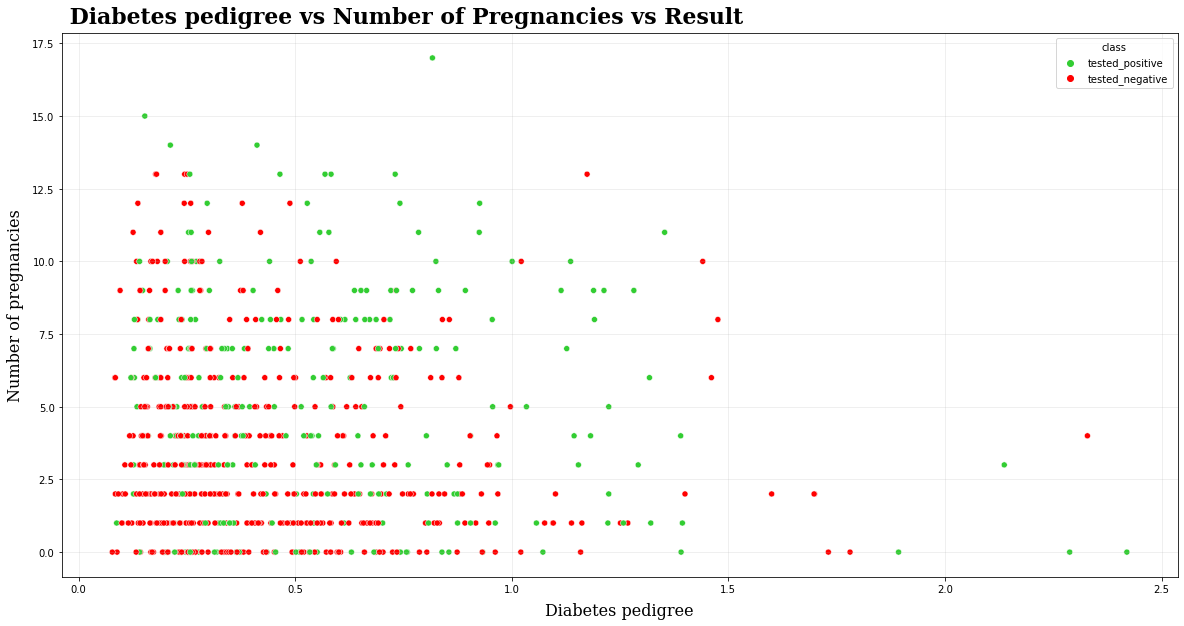

The coefficient of correlation is: 0.1406469525451051


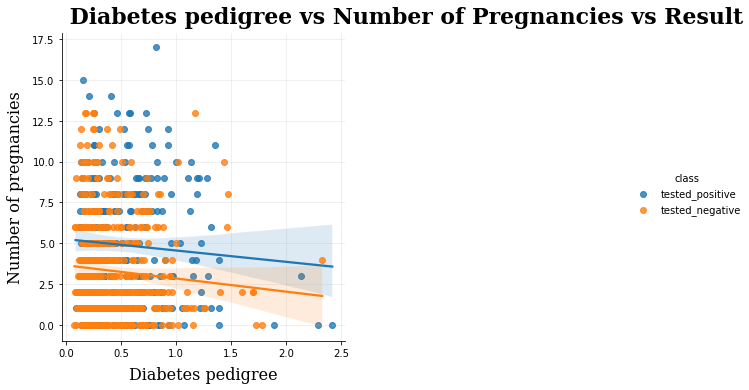

In [23]:
##8 Correlation: Number pregnancies vs Diabetes pedigree vs Result

# The source of the following line of code :https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Diabetes pedigree", y="Number of pregnancies", hue="class",palette=["#32CD32","#FF0000"])

rcParams['figure.figsize'] = 20, 10

plt.title(
    " Diabetes pedigree vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Diabetes pedigree",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()

#Plot 8.2: With regression line

rcParams['figure.figsize'] = 20, 10

x = df["Body mass index"]
y = df["Diabetes pedigree"]

# Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# Plotting both regression lines
regression_plot = sns.lmplot(x="Diabetes pedigree", y="Number of pregnancies", hue="class", data=df)

print('The coefficient of correlation is:', x.corr(y))

plt.title(
    " Diabetes pedigree vs Number of Pregnancies vs Result", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Diabetes pedigree",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Number of pregnancies",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.25)

plt.show()


From the coefficient of correlation obtained by the correlation function (0.14), there seems to be a weak correlation between the diabetes pedigree of the women and the number of pregnancies they had. It is hard to establish any trend between the positive and negative test results in accordance to the pedigree of diabetes, in other words, the likelihood that someone could get diabetes according to their family history with this disease, because those who had a probability of 1 that is a 100%, the majority were diagnosed negative.


# Machine Learning

Choosing models : https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

## Feature engineering

Splitting the original dataset, to create two testing datasets.

Source :https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API 

In [24]:
# Dropping the results to only keep the factors
feature_matrix = df.drop(columns=['class','positive result','negative result'], axis=1)
feature_matrix.shape

(768, 8)

In [25]:

# Creating a result dataframe (Numerical version to be able to find the f1 score later on)
target_result = df['positive result']
# Uncomment if you want the categorical format of the prediction
#target_result = df['class']
target_result

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: positive result, Length: 768, dtype: int64

The following classification models are chosen to predict the diabete diagnosis of a woman based on the 8 factors.

# Decision Tree Model

Source code: 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

* https://scikit-learn.org/stable/modules/tree.html

*   https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



### Training and predicting without splitting the data

In [26]:
#%matplotlib inline : not sure about the purpose of this line
import seaborn as sns; sns.set()
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [27]:
# Fitting the data using sklearn to fit a decision tree model
modelTree = DecisionTreeClassifier().fit(feature_matrix,target_result)

In [28]:
predict_result = modelTree.predict(feature_matrix)

In [29]:
predict_result

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [30]:
# Testing if the model works by changing by a little the values of some factors from the first row of the dataframe
predict = modelTree.predict([[5,140,73,34,0,33,0.50,53]])
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [31]:
#df.head()

### Training and testing by splitting the data to predict the diagnosis of diabetes based on the 8 factors

Source code:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

and 

S. Bhatnagar:Machine Learning to Predict who gets a Loan colab
  



In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the data into a training feature matrix, a testing feature matrix, a training result matrix and a testing result matrix using scikit-learn
# The test size represents the percentage of the original data that will be put to the side to test, once the training is complete with the other remaining percentage

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target_result, test_size=0.20)

# Only 80% of the original data is used to train the model
modelTree = DecisionTreeClassifier().fit(X_train,y_train)
# Testing with the 20% of the data put to the side
training_prediction = modelTree.predict(X_test)

In [40]:
# As can be seen, the predictions are not 100% the same as when there was no training done on the model
training_prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

##Testing the accuracy of the prediction

Source code: https://scikit-learn.org/stable/modules/model_evaluation.html

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# Assigning the predicted values to y_prediction
y_prediction = training_prediction
# y test represents the 20% of the diagnosis result put to the side for testing(The right results) 
y_test
# Comparing the accuracy of the model by comparing the testing resulting data to the predicted result
# This value will fluctuate everytime the model is trained because the training and testing datas keep shuffling
accuracy_score(y_test, y_prediction)

0.6623376623376623

## Decision Tree f1 score

In [43]:
# Will only work if the target_result variable is set to the numerical version 
from sklearn import metrics
from sklearn.metrics import f1_score

f1_tree = f1_score(y_test, y_prediction, average="binary")
f1_tree

0.509433962264151

## Visualizing the Decision Tree

Source code:

S. Bhatnagar:Machine Learning to Predict who gets a Loan colab

and

https://scikit-learn.org/stable/modules/tree.html

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

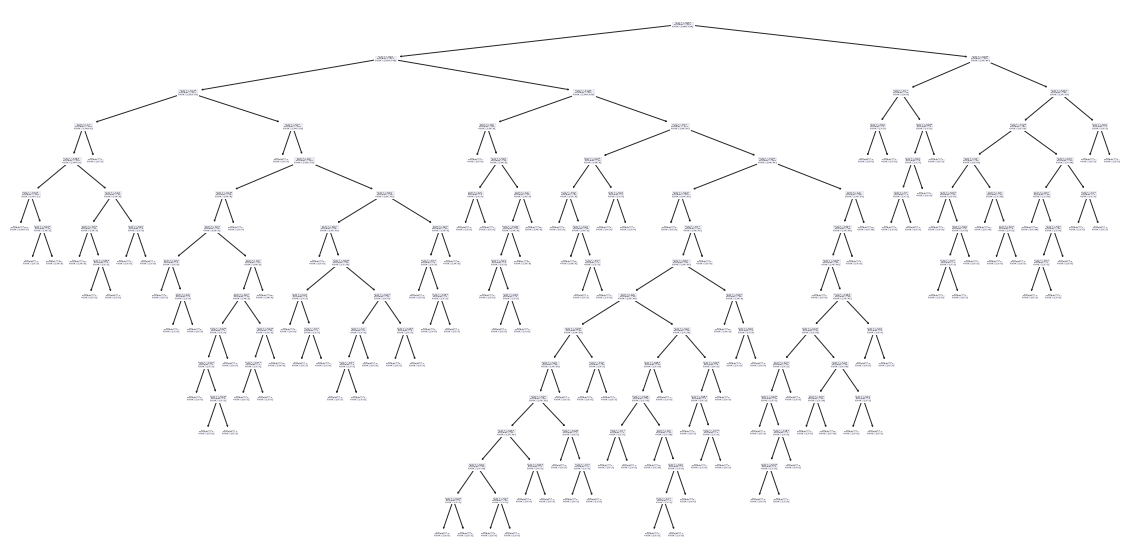

In [45]:
# You may have to reload the imports again
# Takes a bit of time to show the tree
tree = tree.plot_tree(modelTree)
# Uncomment to view each decision made 
#tree

In [46]:
#Using graphviz to get a better look at the tree and how big the decision tree is

In [47]:
#Installing graviz
!pip install graphviz

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [49]:
# You may have to reload the imports again
import graphviz
data = tree.export_graphviz(modelTree, out_file=None) 
graph = graphviz.Source(data) 
# converts the decision into a pdf file
graph.render("Diagnosis")

'Diagnosis.pdf'

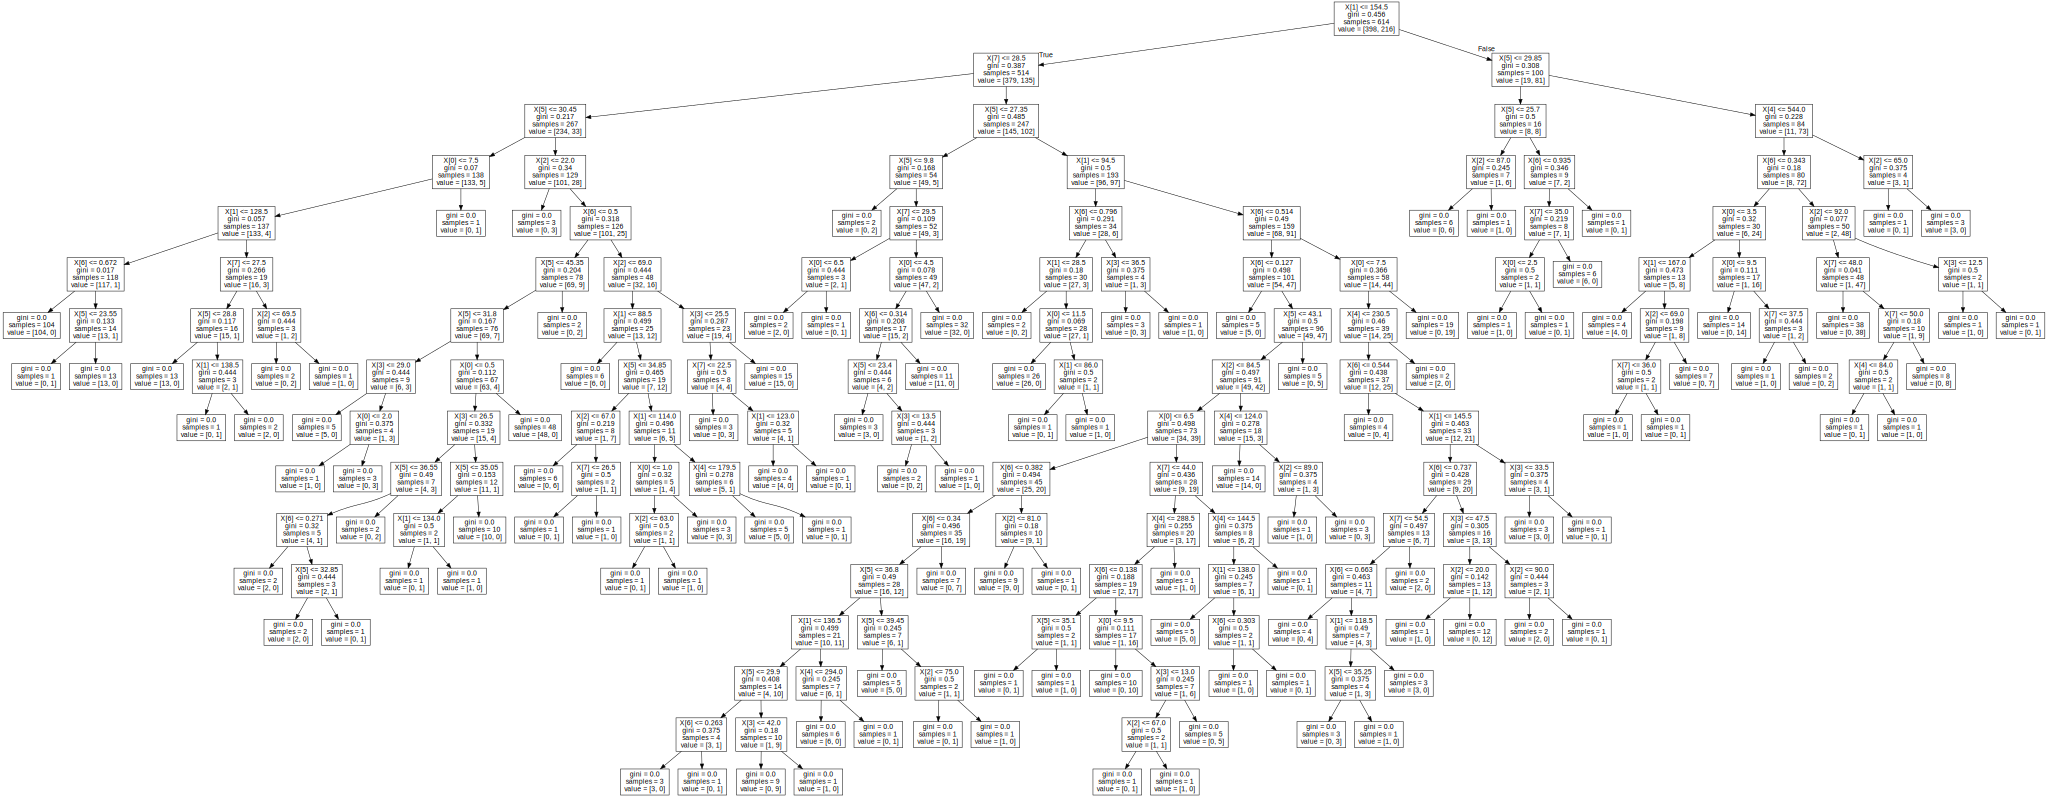

In [50]:
graph = graphviz.Source(data)  
graph 

Since the graph is too wide we will have to save it as a file and show it through pyplot

Source code: https://stackoverflow.com/questions/53391444/how-to-resize-the-image-of-the-tree-using-sklearn-tree-and-export-graph-viz-with

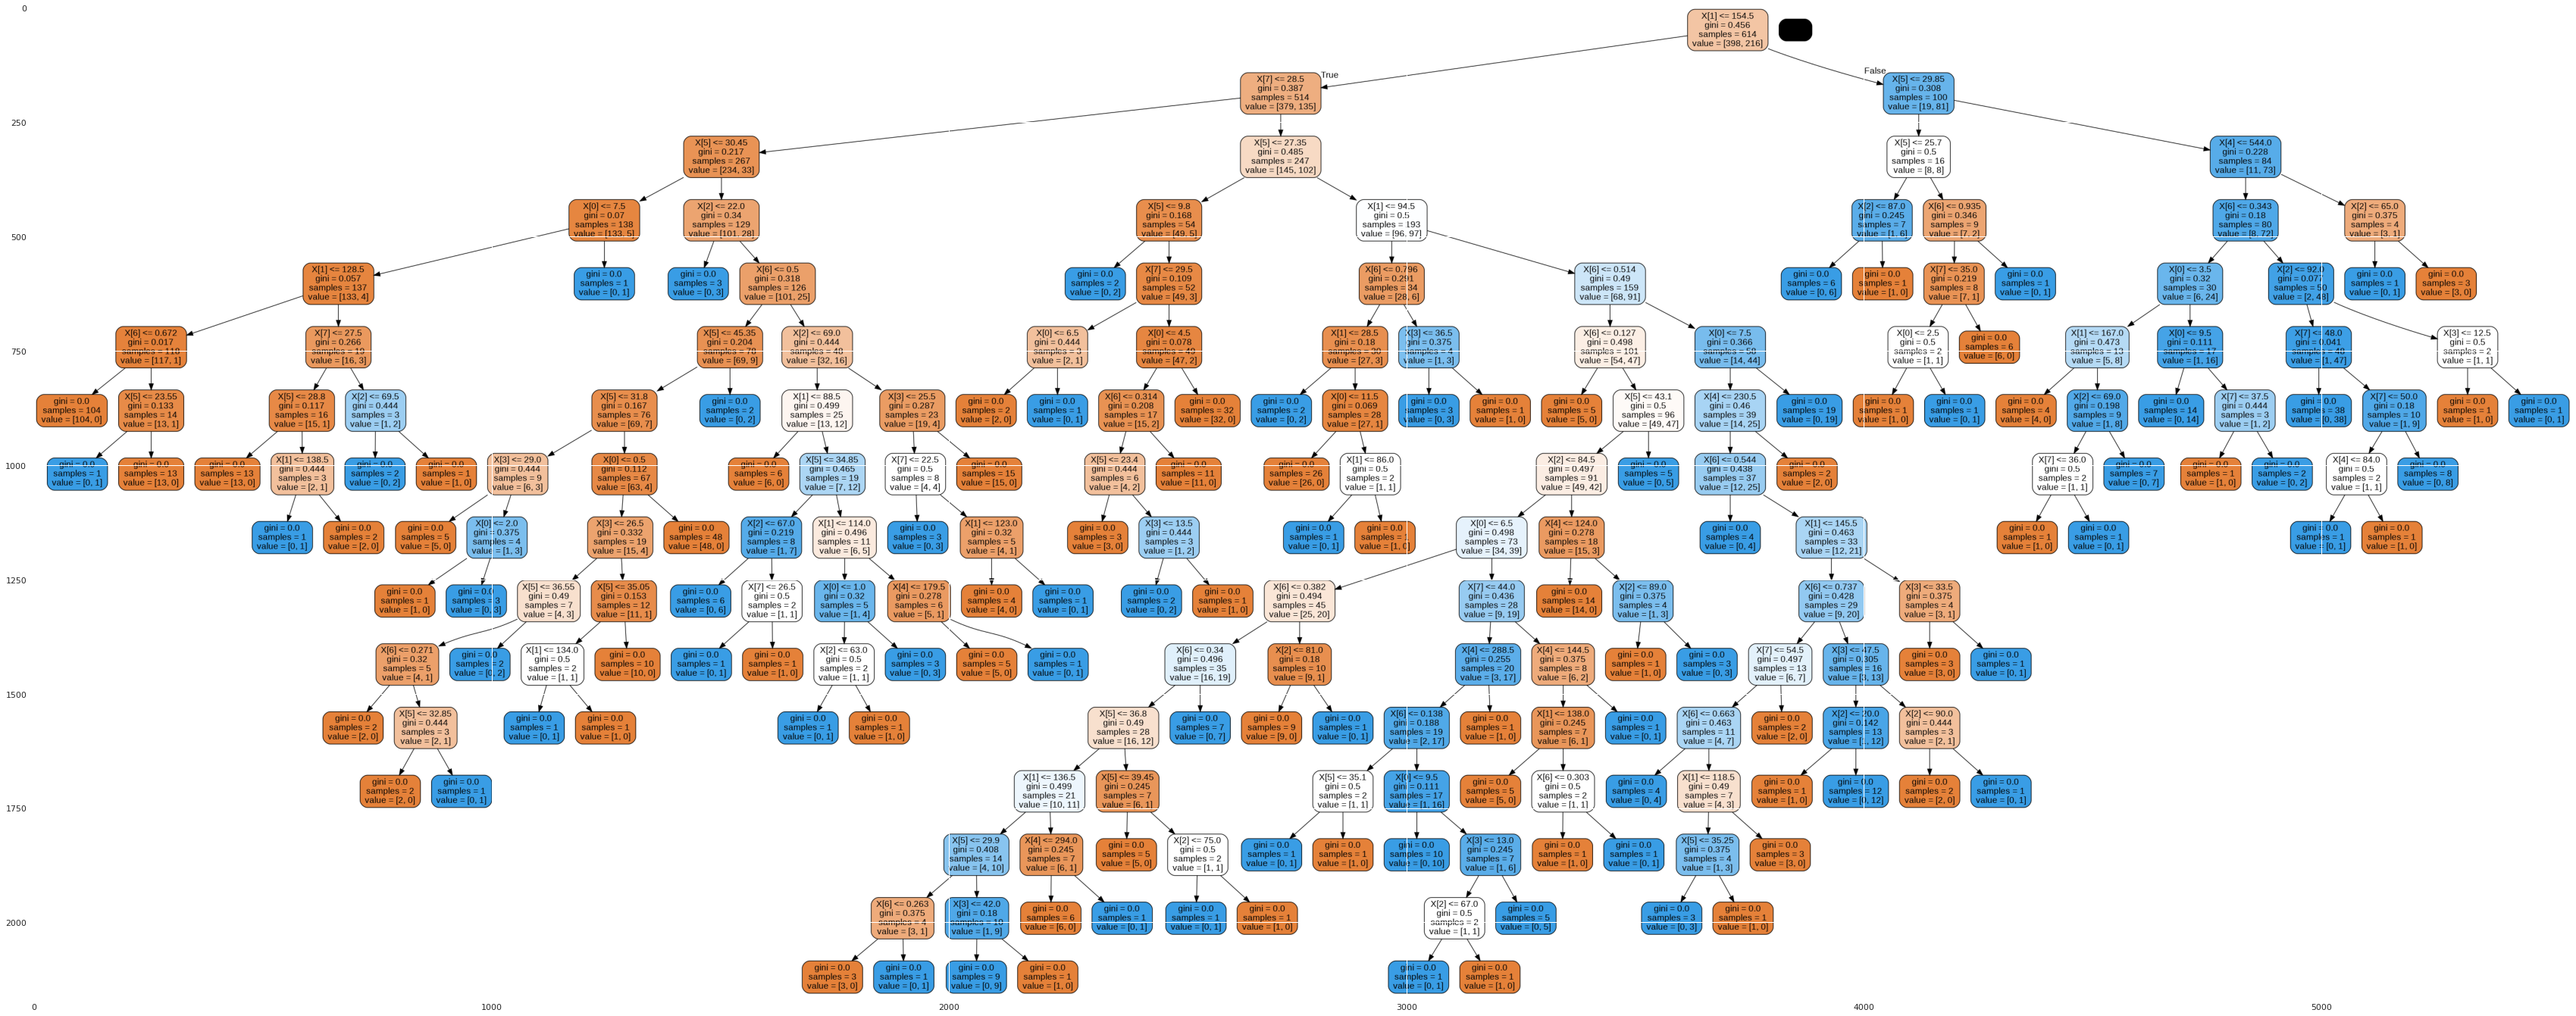

In [63]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

rcParams['figure.figsize'] = 60,60 

data = io.StringIO()

export_graphviz(modelTree, out_file= data, rounded=True, filled=True)

filename = "Diagnosis.png"

pydotplus.graph_from_dot_data(data.getvalue()).write_png(filename)

image = mpimg.imread(filename)
imgplot = plt.imshow(image)

plt.show()

# Logistic Regression Model

Source : 
S. Bhatnagar's colab :Machine Learning to Predict who gets a Loan colab 

### Training to predict diagnosis

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
modelLogistic = LogisticRegression()
modelLogistic

LogisticRegression()

In [66]:
# Creating a sperate dataframe for the result(Numerical version: 1 and 0)
# 1 = Positive for diabetes
# 0 = Negative for diabetes
result = df['positive result']
result

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: positive result, Length: 768, dtype: int64

In [67]:
modelLogistic.fit(X=feature_matrix, y=result)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

From the output, we see that it is necessary to standardize the feature matrix to optimize the results.

Sources: 

*   https://scikit-learn.org/stable/modules/preprocessing.html

*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler


In [68]:
from sklearn import preprocessing
X_train = np.array(feature_matrix)
# preparing the data to be standardized
standardized = preprocessing.StandardScaler().fit(X_train)
standardized

StandardScaler()

In [69]:
# Calculates the mean of each factor
standardized.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [70]:
# Scaling the data in order that the mean and the variance is zero
standardized.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [71]:
# Performing standardization
standardized_feature_matrix = standardized.transform(X_train) 
standardized_feature_matrix

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

 Now that the data is standardized we can go back and use the logistic regression model to predict the diagnosis outcome

In [72]:
modelLogistic.fit(X=standardized_feature_matrix, y=result)

LogisticRegression()

In [73]:
# The following coefficients represent how much of an impact each factor has on the resulting diagnosis
modelLogistic.coef_

array([[ 0.40864687,  1.10711197, -0.25086804,  0.00905046, -0.13083627,
         0.69630872,  0.30883724,  0.17649782]])

In [74]:
# Converting the array of coefficients of correlation into a dataframe
coefficients = pd.DataFrame(modelLogistic.coef_)
#Transposing the dataframe from a single row dataframe to a single column dataframe
coefficients = coefficients.transpose()
coefficients.rename(columns = {0:'Coefficients'},inplace=True)
coefficients

,Coefficients
0,0.408647
1,1.107112
2,-0.250868
3,0.009050
4,-0.130836
5,0.696309
6,0.308837
7,0.176498


In [75]:
# creating a seperate dataframe with the name of each factor 
# Converting the list to an array
names = np.array(feature_matrix.columns)
names = pd.DataFrame(names)
names.rename(columns = {0:'Names'},inplace=True)
names

,Names
0,Number of pregnancies
1,Plasma glucose concentration
2,Diastolic blood pressure
3,Triceps skin fold thickness
4,Insulin
5,Body mass index
6,Diabetes pedigree
7,age


In [76]:
# Concatenating both data frames to visualise the influence of each factor on the diabetes test result
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
coef_df= pd.concat([names,coefficients], axis=1)
coef_df = coef_df.set_index('Names')
coef_df

,Coefficients
Names,
Number of pregnancies,0.408647
Plasma glucose concentration,1.107112
Diastolic blood pressure,-0.250868
Triceps skin fold thickness,0.009050
Insulin,-0.130836
Body mass index,0.696309
Diabetes pedigree,0.308837
age,0.176498


###Visualizing the influence of each factor based on their respective coefficient of correlation 

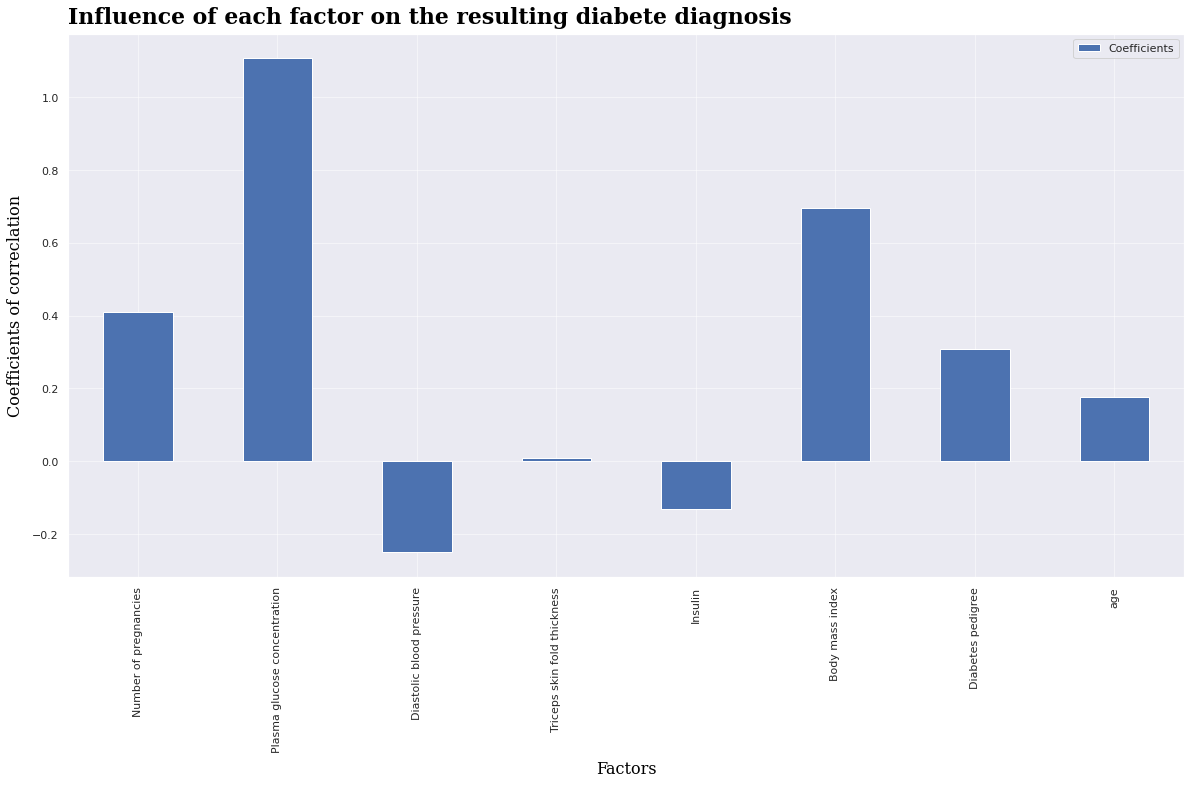

In [77]:
rcParams['figure.figsize'] = 20, 10

plot =  coef_df.plot.bar()

# Formating source J. Sumner colab: MakingPrettyPictures

plt.title(
    "Influence of each factor on the resulting diabete diagnosis", 
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='left',
    pad=10
)
plt.xlabel(
    "Factors",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)
plt.ylabel(
    "Coefficients of correclation",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8
)

plt.grid(True, axis='both', alpha=0.5)

As can be seen, the plasma glucose concentration and the body mass index seem to be the most influential factors in the diabetes diagnosis of women, followed by the number of pregnancies, diabetes pedigree and age. All these factors being positive and having a high correlation is sensible because diabetes is caused by an excess of glucose in the bloodstream. Having a body mass index higher than usual may put an individual more at risk which also can confirm the importance of this factor, in the resulting diagnosis. Surprisingly the number of pregnancies a woman went through does have a significant impact on their chances of getting diabetes. This could make sense because a lot of women do gain a significant amount of weight during their pregnancy which can increase their body mass index. For the diabetes pedigree and the age factor, I would have assumed a greater correlation although it is true that many young people nowadays are also diagnosed with diabetes thus reducing its importance in the resulting prediction diagnosis. As for the pedigree, it also makes sense, to a certain degree, that it does not have a significant correlation because most people don't have a long line of familial diagnoses available.

The triceps skin fold thickness factor seems to have little to no effect on the resulting diagnosis. The lack of significance of this test on the resulting diabetes result completely makes sense. Notably, because this particular test tries to estimate the individual's body fat, which is something that is not distributed evenly for each individual.

As for the diastolic blood pressure and the insulin already prescribed, having a negative correlation could imply that these factors are not as representative of the outcome diagnosis compared to the other factors. In other words, they may not have a significant impact on the prediction of the diagnosis or they may impact the prediction in a different manner than the factors with positive correlation coefficients. Although, I would have assumed that blood pressure and insulin already prescribed would be important factors in the prediction of a diabetes diagnosis. Their negative correlation somewhat makes sense because insulin can be used for medical purposes other than diabetes and blood pressure is not something that is constant, that is it can fluctuate based on other health factors. 

###Back to training the model using logistic regression

### Training to predict with the stadardized feature matrix

Source :  S. Bhatnagar:Machine Learning to Predict who gets a Loan colab

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
modelLogistic = LogisticRegression()
modelLogistic

LogisticRegression()

In [79]:
# Fitting the standardized data and the numerical resulting data in the logistic regression model using sci-kit learn 

modelLogistic = LogisticRegression().fit(standardized_feature_matrix,result)
modelLogistic

LogisticRegression()

In [80]:
# Splitting the data into a training feature matrix, a testing feature matrix, a training result matrix and a testing result matrix using scikit-learn
# The test size represents the percentage of the original data that will be put to the side to test, once the training is complete with the other remaining percentage
X_train, X_test, y_train, y_test = train_test_split(standardized_feature_matrix, result, test_size=0.20)

# Only 80% of the original data is used to train the model
modelLogistic = LogisticRegression().fit(standardized_feature_matrix,result)

# Testing with the 20% of the data put to the side
training_prediction = modelLogistic.predict(X_test)

In [81]:
# 1 = Positive for diabetes
# 0 = Negative for diabetes
training_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

##Testing the accuracy of the model

Source code: https://scikit-learn.org/stable/modules/model_evaluation.html

In [82]:
from sklearn.metrics import accuracy_score

In [96]:
# Assigning the predicted values to y_prediction
y_prediction = training_prediction
# y test represents the 20% of the diagnosis result put to the side for testing(The right results) 
y_test
# Testing the accuracy of the model by comparing the resulting data(tested) to the predicted result
# This value will fluctuate everytime the model is trained because the training and testing datas keep shuffling
accuracy_score(y_test, y_prediction)

0.7792207792207793

## Logistic Regression f1 score

In [97]:
from sklearn import metrics

f1_logistic = f1_score(y_test, y_prediction, average="binary")
f1_logistic

0.6530612244897959

# Comparing both models

Source code : S. Bhatnagar's colab : Machine Learning to Predict who gets a Loan colab

Comparing the f1 scores of the Decision Tree and the Logistic Regression models.

In [98]:
from sklearn.metrics import precision_score,recall_score,f1_score
pd.DataFrame(
    {
        "Logistic Regression":f1_logistic,
        "Decision Tree":(f1_tree)
    },
    index=["f1_score"]
)

,Logistic Regression,Decision Tree
f1_score,0.653061,0.509434


# Conclusion

As can be seen from the comparison of the f1 scores, both models have a similar precision-recall mean. Both of their f1 scores often find themselves to be around the 0.60 mark, fluctuating every time each model is trained, which is not the best but not the worst since it is closer to 1 the perfection mark than 0. If both models are trained multiple times, the f1 score of the logistic regression model is often less than the decision tree one, this makes sense since the decision tree model is known to handle colinearity better than the logistic regression model. Therefore, the decision tree model would be a better option, in general.

Source: https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

